## 서울시 미세먼지와 어린이집 분포 EDA

### EDA (Exploratory Data Analysis)

이 노트북은 프로젝트 데이터의 구조와 특성을 파악하고, 본격적인 모델링에 앞서 전반적인 데이터 분포 및 이상치, 결측치, 변수 간 관계 등을 탐색하기 위해 작성되었습니다.

- 주요 변수의 분포 및 통계 요약
- 결측치 및 이상치 확인
- 변수 간 상관 관계 분석
- 시각화를 통한 데이터 특성 이해

EDA를 통해 모델링에 적합한 형태로 데이터를 전처리하고, 인사이트를 도출하는 데 목적이 있습니다.

### 1. 데이터 로드 및 기본 설정

In [20]:
#  Jupyter Notebook에서 외부 모듈(.py 파일)을 수정할 경우,
#  매번 커널을 재시작하거나 수동으로 reload하지 않아도
#  자동으로 가장 최신 상태로 import 되도록 설정합니다.

# %load_ext autoreload:
# IPython의 autoreload 확장 기능을 불러옵니다.
# 이 기능은 외부 .py 파일이 변경될 때 자동으로 다시 import 하도록 도와줍니다.

# %autoreload 2:
# 모든 모듈을 cell 실행 시마다 자동으로 reload합니다.
# (즉, 외부 .py 파일을 수정하고 저장만 해도 바로 반영됨)

# 사용 예:
#   - utils.py, visualization.py 등 자주 수정하는 모듈이 있는 경우
#   - 매번 커널 재시작 없이 편리하게 함수 변경 사항을 반영하고 싶을 때

# 단, 모듈의 내부 상태를 유지하고 싶은 경우에는 주의해서 사용해야 합니다.

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import sys
import os

# 프로젝트 루트 경로를 sys.path에 추가
project_root = os.path.abspath("..")  # notebooks 폴더 기준 상위 폴더
if project_root not in sys.path:
    sys.path.append(project_root)

In [22]:
# !pip install seaborn==0.13.2

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.utils import setup_font

# 한글 폰트 설정
setup_font()

# 시각화 스타일 설정
sns.set_style("whitegrid")
sns.set_palette('Set2')


Current OS: Darwin
Setting macOS font: AppleGothic
Current font settings: ['AppleGothic']


### 2. 원본 데이터 로드

### 3. 데이터 기본 정보 확인

In [24]:
# 어린이집 데이터 기본 정보
daycare_df = pd.read_csv("../data/processed/result/daycare_air_quality_with_distance.csv", encoding="utf-8")

/var/folders/2x/x768sjcx2ds8_1npxt7wbhym0000gn/T/ipykernel_96682/1774177798.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  daycare_df = pd.read_csv("../data/processed/result/daycare_air_quality_with_distance.csv", encoding="utf-8")


In [25]:
print("=== 어린이집 데이터 정보 ===")
print("\n[기본 정보]")
daycare_df.info()

print("\n[결측치 확인]")
print(daycare_df.isna().sum())

print("\n[기술 통계량]")
print(daycare_df.describe())


=== 어린이집 데이터 정보 ===

[기본 정보]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11196580 entries, 0 to 11196579
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   날짜           object 
 1   측정소명         object 
 2   pm10         object 
 3   pm25         object 
 4   평균기온(°C)     float64
 5   일강수량(mm)     float64
 6   평균 풍속(m/s)   float64
 7   어린이집 위치      object 
 8   위도           float64
 9   경도           float64
 10  어린이집명        object 
 11  측정소까지거리(km)  float64
dtypes: float64(6), object(6)
memory usage: 1.0+ GB

[결측치 확인]
날짜                 0
측정소명               0
pm10           24641
pm25           24641
평균기온(°C)       67046
일강수량(mm)       97061
평균 풍속(m/s)     67291
어린이집 위치            0
위도                 0
경도                 0
어린이집명              0
측정소까지거리(km)        0
dtype: int64

[기술 통계량]
           평균기온(°C)      일강수량(mm)    평균 풍속(m/s)            위도            경도  \
count  1.112953e+07  1.109952e+07  1.112929e+07  1.119658e+07  1.119658e+07 

In [26]:
from scripts.utils import add_month_column

daycare_df = add_month_column(daycare_df)

In [27]:
print("\n[전체 데이터 확인]")
daycare_df.head()


[전체 데이터 확인]


,날짜,측정소명,pm10,pm25,평균기온(°C),일강수량(mm),평균 풍속(m/s),어린이집 위치,위도,경도,어린이집명,측정소까지거리(km),month
0,2018-01-01,강남구,28.0,75.0,0.3,0.0,1.4,강남구,37.484064,127.043581,성아어린이집,3.745348,1
1,2018-01-01,강남구,28.0,75.0,0.3,0.0,1.4,강남구,37.501472,127.056348,선재어린이집,1.936213,1
2,2018-01-01,강남구,28.0,75.0,0.3,0.0,1.4,강남구,37.525327,127.036350,바롬어린이집,1.339645,1
3,2018-01-01,강남구,28.0,75.0,0.3,0.0,1.4,강남구,37.517259,127.037184,연화어린이집,0.951706,1
4,2018-01-01,강남구,28.0,75.0,0.3,0.0,1.4,강남구,37.511002,127.026869,논현어린이집,1.998995,1


In [29]:
monitoring_station_df = pd.read_csv("../data/raw/monitoringStation/seoul_monitoring_stations.csv", encoding='utf-8')

In [30]:
# 측정소 데이터 기본 정보
print("=== 측정소 데이터 정보 ===")
print("\n[기본 정보]")
monitoring_station_df.info()

print("\n[결측치 확인]")
print(monitoring_station_df.isna().sum())

print("\n[기술 통계량]")
print(monitoring_station_df.describe())


=== 측정소 데이터 정보 ===

[기본 정보]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     25 non-null     object 
 1   측정소명    25 non-null     object 
 2   측정소 주소  25 non-null     object 
 3   운영기관    25 non-null     object 
 4   설치년도    25 non-null     int64  
 5   위도      25 non-null     float64
 6   경도      25 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.5+ KB

[결측치 확인]
지역명       0
측정소명      0
측정소 주소    0
운영기관      0
설치년도      0
위도        0
경도        0
dtype: int64

[기술 통계량]
              설치년도         위도          경도
count    25.000000  25.000000   25.000000
mean   1986.360000  37.552920  126.990360
std       8.596899   0.054919    0.079708
min    1973.000000  37.450987  126.835650
25%    1980.000000  37.517566  126.933528
50%    1984.000000  37.544672  127.000205
75%    1997.000000  37.584906  127.047968
max    1997.000000  37

In [31]:
print("\n[전체 데이터 확인]")
monitoring_station_df


[전체 데이터 확인]


,지역명,측정소명,측정소 주소,운영기관,설치년도,위도,경도
0,서울,강남구,서울 강남구 학동로 426 강남구청 별관 1동,서울특별시보건환경연구원,1978,37.517566,127.047968
1,서울,강동구,서울 강동구 구천면로 42길 59 천호1동 주민센터,서울특별시보건환경연구원,1997,37.544989,127.136799
2,서울,강북구,서울 강북구 삼양로 139길 49 우이동 주민센터,서울특별시보건환경연구원,1997,37.647883,127.011869
3,서울,강서구,서울 강서구 강서로 45 다길 71 화곡3동 푸른들청소년도서관,서울특별시보건환경연구원,1992,37.544672,126.835650
4,서울,관악구,서울특별시 관악구 행운1길 43 (봉천동) 행운동 주민센터 옥상,서울특별시보건환경연구원,1979,37.480602,126.957604
5,서울,광진구,서울특별시 광진구 광나루로 571 구의 아리수정수센터,서울특별시보건환경연구원,1980,37.544207,127.093013
6,서울,구로구,서울 구로구 가마산로 27길 45 구로고등학교,서울특별시보건환경연구원,1980,37.498256,126.890116
7,서울,금천구,서울 금천구 금하로21길 20 시흥5동 주민센터,서울특별시보건환경연구원,1997,37.450987,126.908360
8,서울,노원구,서울 노원구 상계로 118 상계2동 주민센터 (23길 17 노원구 원터행복발전소),서울특별시보건환경연구원,1997,37.658773,127.068511
9,서울,도봉구,서울 도봉구 시루봉로2길 34 쌍문동청소년문화의집,서울특별시보건환경연구원,1982,37.654139,127.029001


### 4. 상관관계 분석

In [32]:
setup_font() # 한글 폰트 설정(시간이 지나면 인식 못하는 문제 때문에 재실행)

Current OS: Darwin
Setting macOS font: AppleGothic
Current font settings: ['AppleGothic']


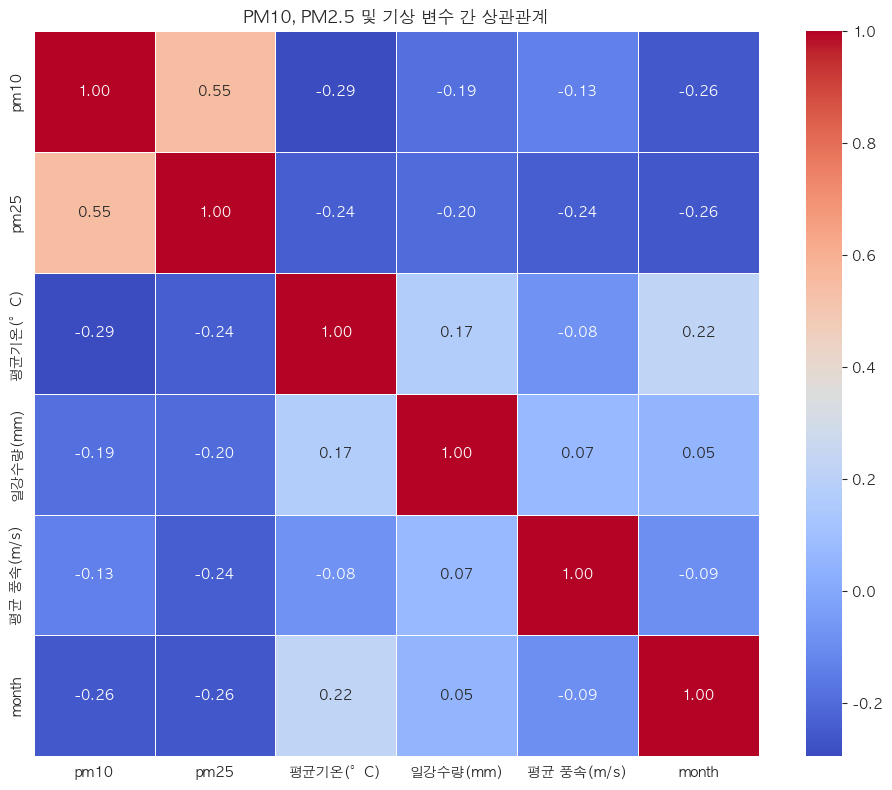

In [33]:
# 미세먼지 관련 변수들의 상관관계
selected_columns = ["pm10", "pm25", "평균기온(°C)", "일강수량(mm)", "평균 풍속(m/s)", "month"]

# 숫자형 컬럼을 float으로 변환
daycare_df[selected_columns] = daycare_df[selected_columns].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# 결측치 제거 및 공백 제거
daycare_df = daycare_df.dropna(subset=selected_columns).replace(" ", np.nan)

# 해당 컬럼 추출
corr_df = daycare_df[selected_columns]

# 상관계수 계산
corr_matrix = corr_df.corr(method='pearson')

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("PM10, PM2.5 및 기상 변수 간 상관관계")
plt.tight_layout()
plt.show()

In [34]:
from scripts.utils import pivot_monthly_avg_by_station

pm10_monthly_avg = pivot_monthly_avg_by_station(daycare_df, value_col="pm10")

pm10_monthly_avg.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
측정소명,,,,,,,,,,,,
강남구,36.962963,36.636364,42.705069,37.096154,32.754630,26.200957,21.985577,20.829268,17.192513,24.323810,32.276190,32.365741
강동구,41.456221,39.934343,46.179724,40.242857,34.994898,26.740933,21.304147,20.294931,17.976190,27.274882,36.304762,36.465438
강북구,40.709677,39.494949,45.111111,38.976190,34.308756,26.885714,23.211982,22.465438,18.180952,23.786047,31.858537,35.225806
강서구,43.748837,41.594872,48.299065,41.285714,37.032258,27.181373,21.902778,20.455399,18.309524,27.379808,36.699029,37.736111
관악구,39.025404,38.208122,46.133641,41.447619,37.174014,30.192308,23.579070,22.284314,20.432507,27.937355,35.012195,34.018433


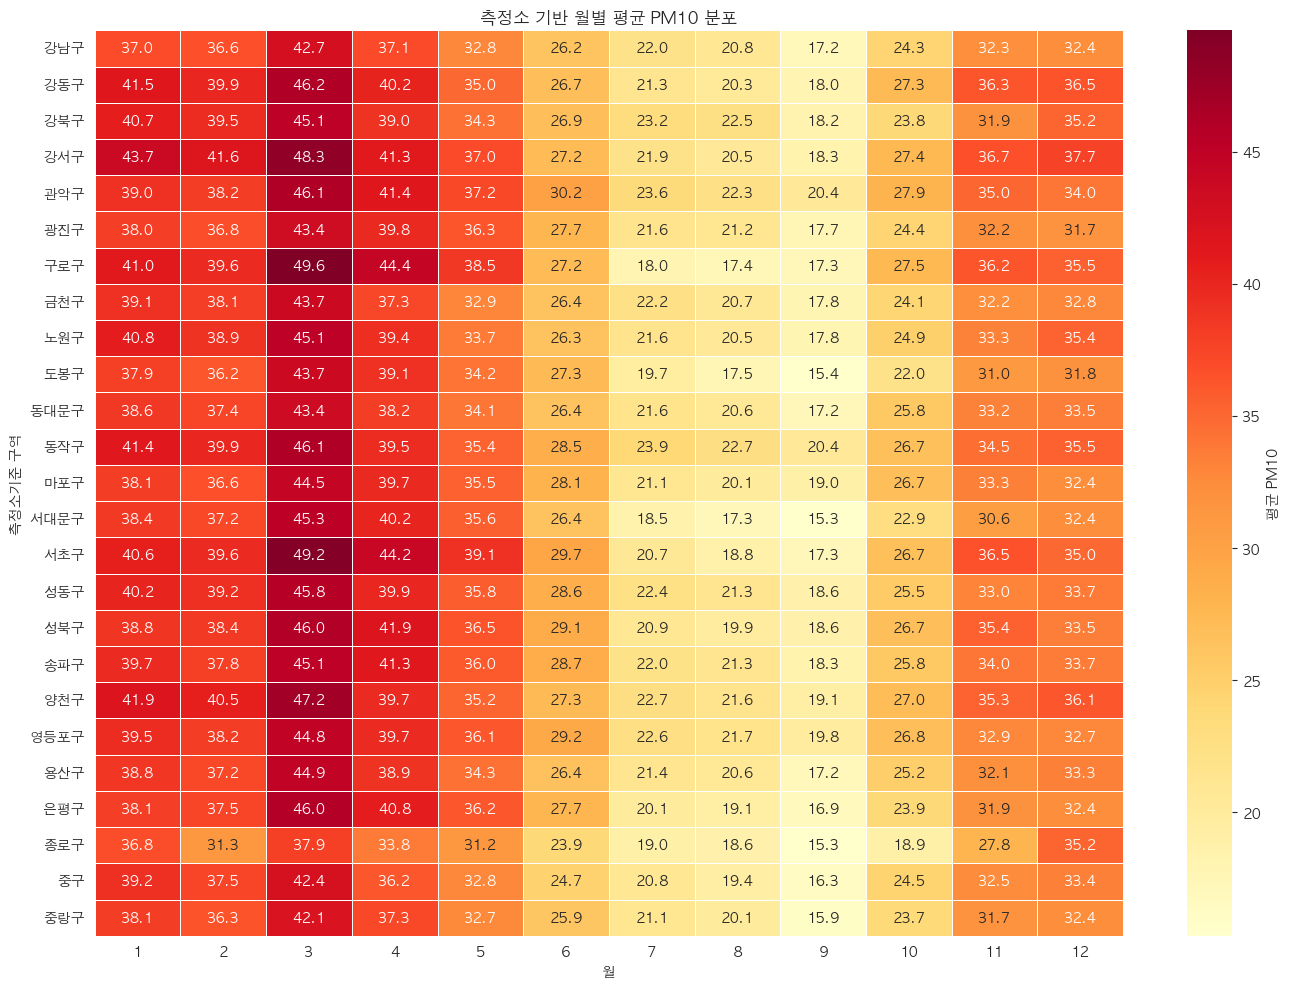

In [35]:
plt.figure(figsize=(14, 10))
sns.heatmap(pm10_monthly_avg, cmap="YlOrRd", annot=True, fmt=".1f", linewidths=0.5, cbar_kws={"label": "평균 PM10"})
plt.title("측정소 기반 월별 평균 PM10 분포")
plt.xlabel("월")
plt.ylabel("측정소기준 구역")
plt.tight_layout()
plt.show()

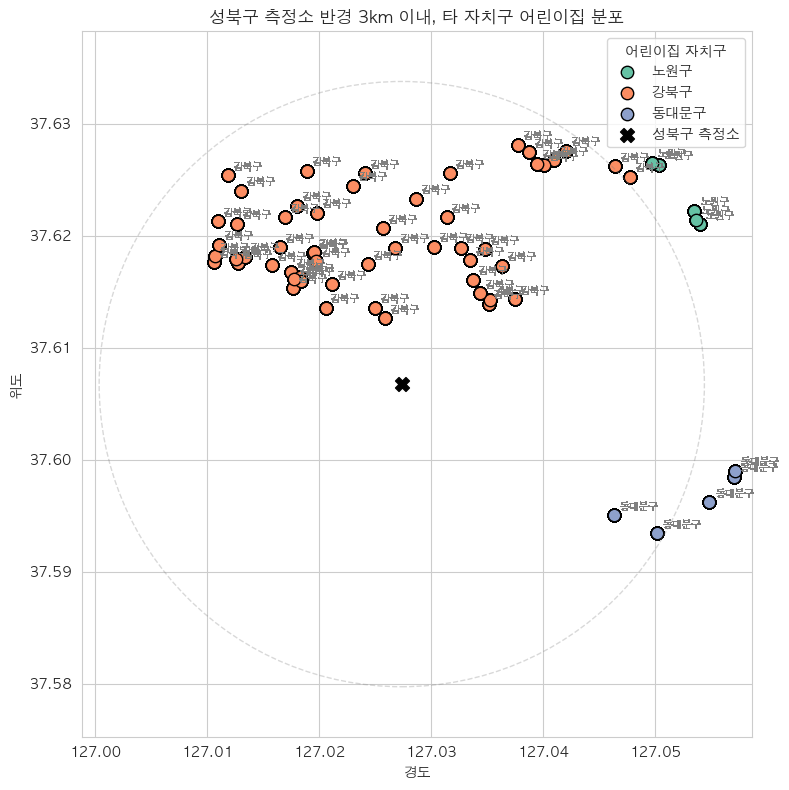

In [36]:
from scripts.visualization import plot_nearby_daycares_outside_district

plot_nearby_daycares_outside_district(daycare_df, monitoring_station_df, "성북구")

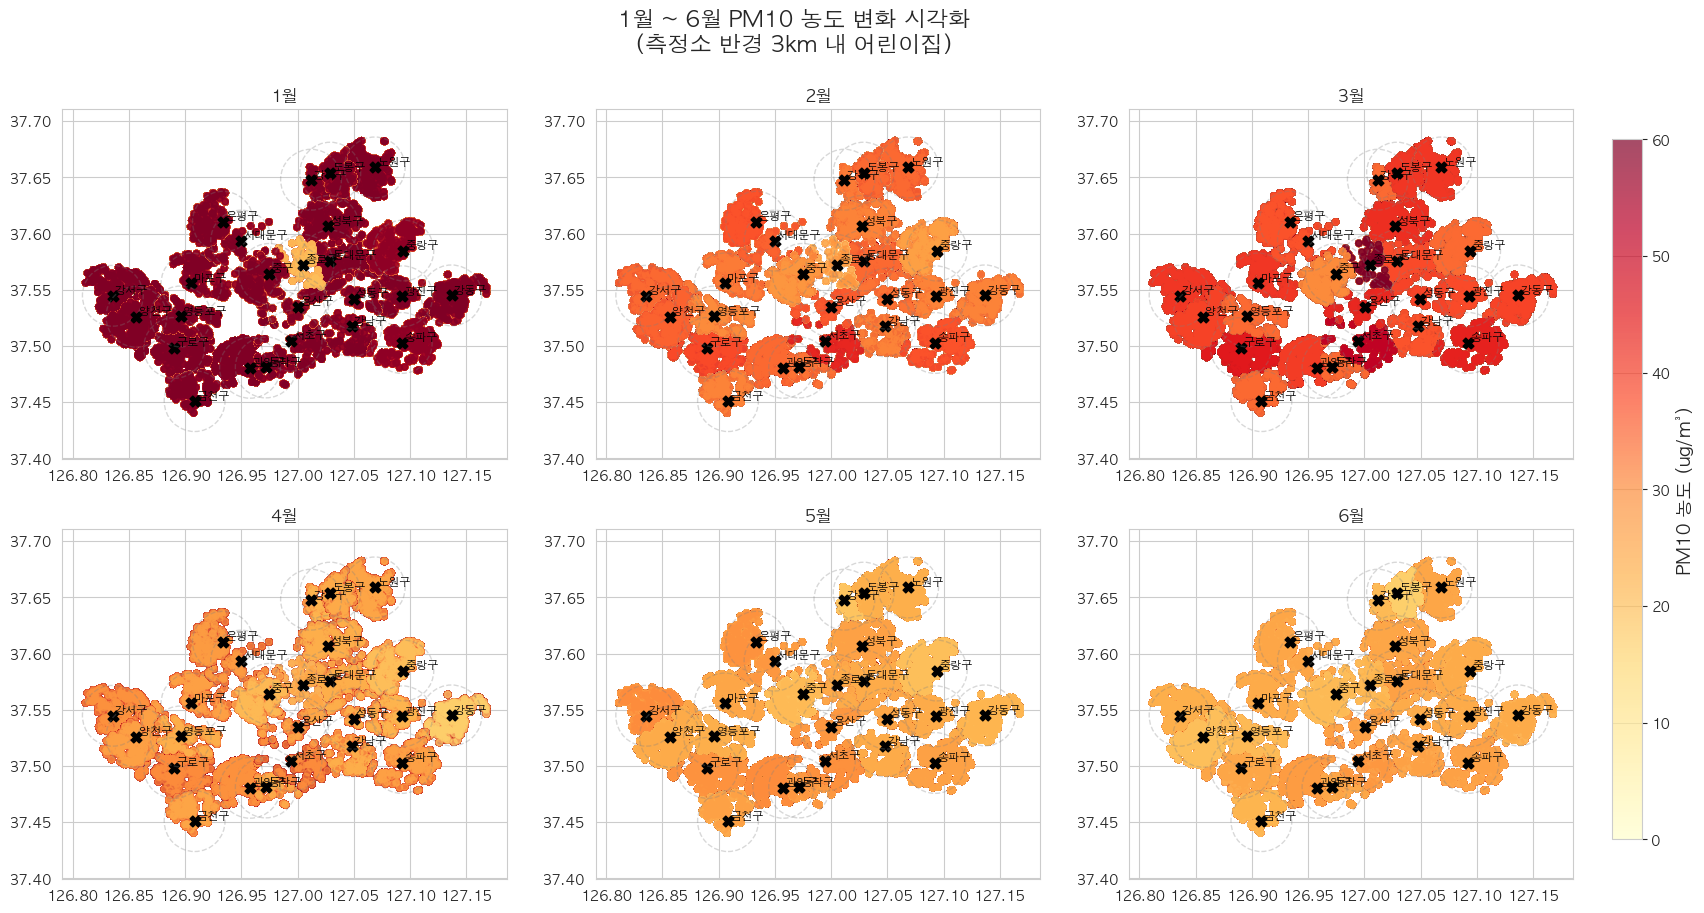

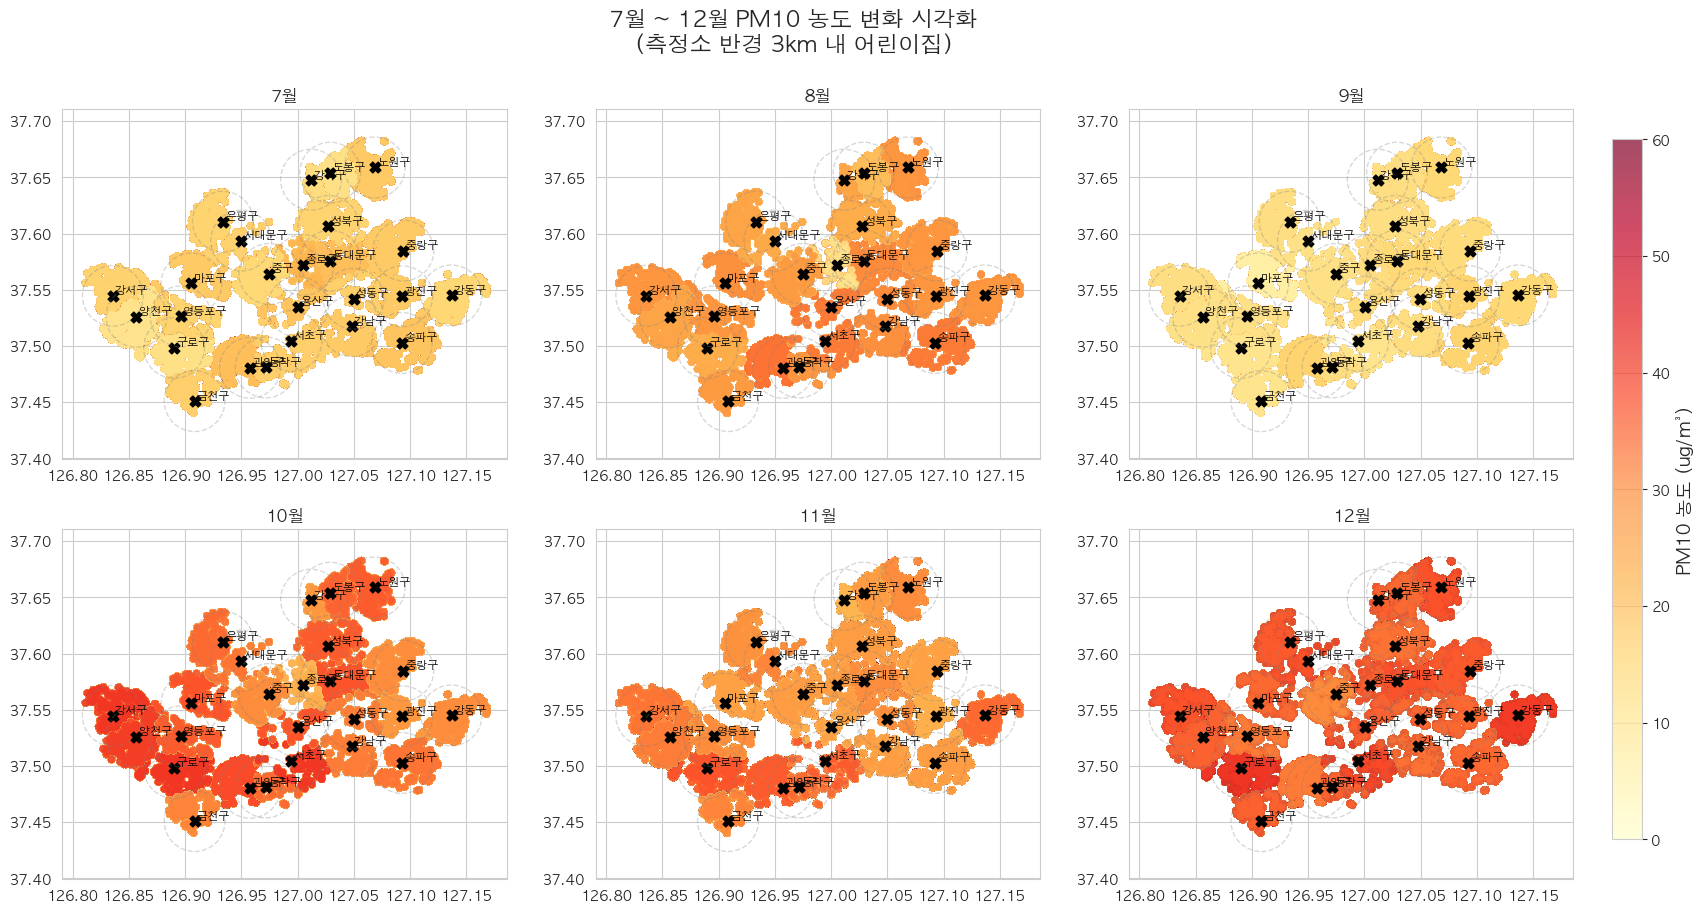

In [37]:
from scripts.visualization import draw_monthly_pm10_subplot

draw_monthly_pm10_subplot(daycare_df, monitoring_station_df, 1, 6) # 1월 ~ 6월
draw_monthly_pm10_subplot(daycare_df, monitoring_station_df, 7, 12) # 7월 ~ 12월

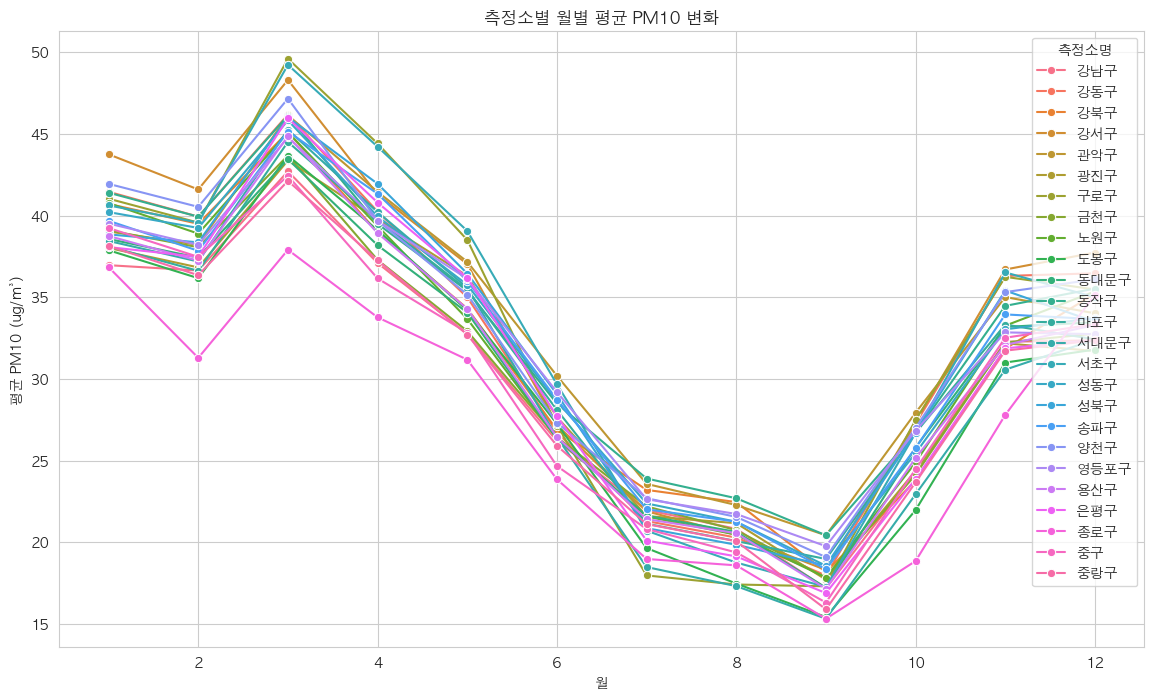

In [38]:
# 각 측정소기준 자치구별 월별 평균 PM10
avg_pm10 = daycare_df.groupby(["측정소명", "month"])["pm10"].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_pm10, x="month", y="pm10", hue="측정소명", marker="o")
plt.title("측정소별 월별 평균 PM10 변화")
plt.xlabel("월")
plt.ylabel("평균 PM10 (ug/m³)")
plt.grid(True)
plt.show()

### '나쁨' 등급만 시각화한 이유

PM10 등급 중 '나쁨'만 선택하여 히트맵을 그리는 이유는 다음과 같습니다

1. **정책 대응 기준 중심**
   - 국내 대기환경 행정 기준은 보통 '나쁨' 이상부터 주의 및 경고, 외부 활동 제한 등의 조치를 취합니다.
   - 따라서 '좋음'과 '보통'보다는 '나쁨' 등급 빈도가 정책 수립에 더 직접적인 영향을 미칩니다.

2. **'매우 나쁨'의 희소성**
   - '매우 나쁨' 등급은 발생 빈도가 낮고 일부 구간에만 집중되어 있어,
     전체 패턴 분석보다는 특정 사례 분석에 더 적합합니다.

3. **시각적 명확성 유지**
   - '나쁨'과 '매우 나쁨'을 함께 시각화하면 색상 스케일이 왜곡되어 주요 흐름이 오히려 눈에 덜 띌 수 있습니다.
   - 따라서 히트맵에서는 '나쁨'만을 집중적으로 시각화하였습니다.

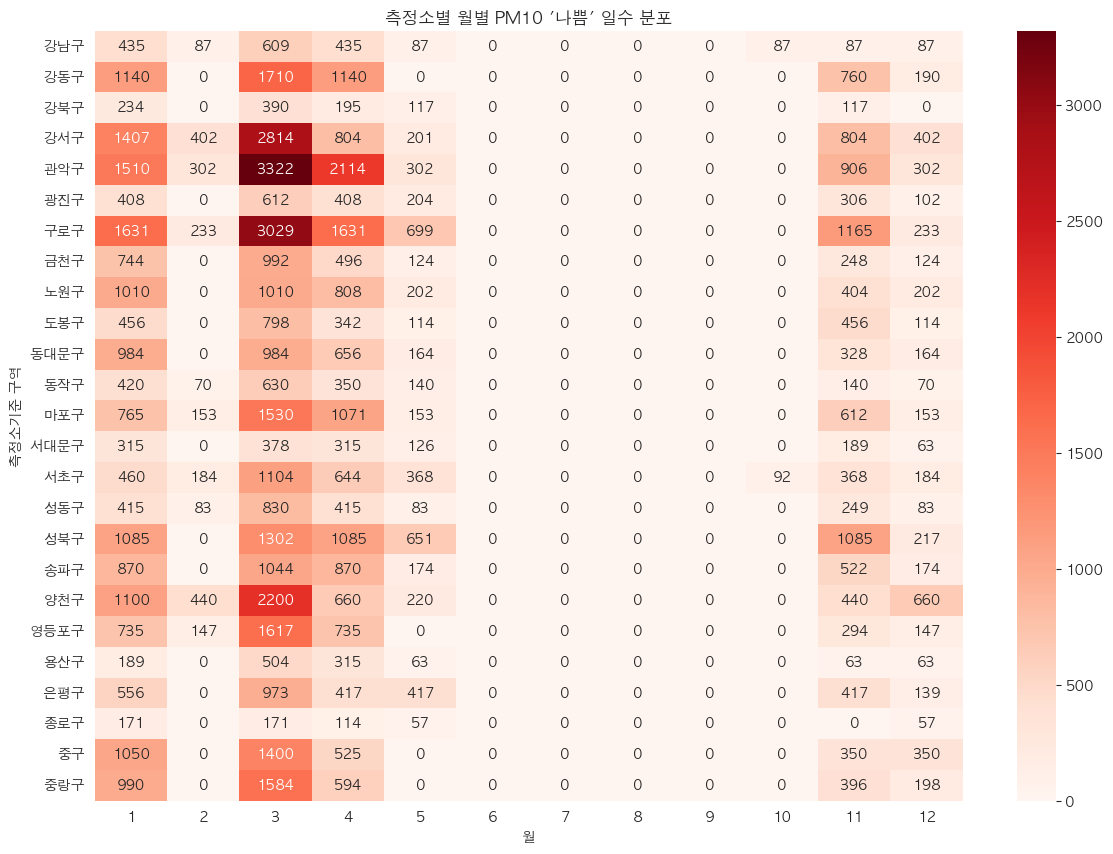

In [39]:
from scripts.visualization import plot_bad_pm10_heatmap

plot_bad_pm10_heatmap(daycare_df)